<a href="https://colab.research.google.com/github/sdforero/Human-ressources-analytics/blob/main/Human_ressources_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. CARGAR LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LEER DATOS

In [ ]:
# Permitir ir a Colab extraer info de Google drive
from google.colab import drive
drive.mount('/content/drive')

# Copiar la ruta del archivo de Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Human ressources analytics/HRDataset.csv'

# Leer la ruta del arvcho y guardar en dataframe
dataframe = pd.read_csv(path)

# Ver dos filas de arriba
dataframe.head(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,62506.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5.0,0.0,1/17/2019,0.0,1.0
Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,104437.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0


## 2.1. Analizar dataframe

In [ ]:
# Ver tamaño del dataframe
dataframe.shape

(311, 36)

In [ ]:
# Mostrar tail 2
dataframe.tail(2)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
Zhou,Julia,10043.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,89292.0,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.0,3.0,5.0,2/1/2019,0.0,11.0
Zima,Colleen,10271.0,0.0,4.0,0.0,1.0,5.0,3.0,0.0,45046.0,...,David Stanley,14.0,LinkedIn,Fully Meets,4.5,5.0,0.0,1/30/2019,0.0,2.0


In [ ]:
# Generar index numérico al dataframe
dataframe.reset_index(inplace=True)
dataframe.head(2)


,index,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5.0,0.0,1/17/2019,0.0,1.0
1,Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0


In [ ]:
# Cambiar nombre columna index a LastName

dataframe.rename(columns={dataframe.columns[0]: 'LastName'}, inplace = True)
dataframe.head(2)

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5.0,0.0,1/17/2019,0.0,1.0
1,Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0


In [ ]:
# Ver los nulos de la columna 'Employee_Name'
dataframe['Employee_Name'].isnull().sum()

4

In [ ]:
# Saber exactamente cuáles son los nulos. Vemos que hay un error en la exportación de datos. Todos los datos están en la primera columna.
dataframe[dataframe['Employee_Name'].isnull()]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
85,"Evensen, April,10296,0,0,0,4,5,2,0,59124,1,19,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,"Goble, Taisha,10246,0,0,0,4,3,3,0,114800,1,8,D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,"Howard, Estelle,10182,1,1,0,1,1,3,0,49920,1,2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,"Voldemort, Lord,10118,1,1,1,4,3,3,0,113999,1,8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.1. Normalizar index 85

In [ ]:
# Ver toda la fila index 85
dataframe.iloc[85: 86]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
85,"Evensen, April,10296,0,0,0,4,5,2,0,59124,1,19,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extraer todo el contenido de index 85 y columna LastName que está separados por comas

txt85 = dataframe.iloc[85, 0].split(',')
txt85

['Evensen',
 ' April',
 '10296',
 '0',
 '0',
 '0',
 '4',
 '5',
 '2',
 '0',
 '59124',
 '1',
 '19',
 'Production Technician I',
 'MA',
 '02458',
 '05/06/89',
 'F',
 'Single',
 'US Citizen',
 'No',
 'White',
 '2/17/2014',
 '2/25/2018',
 '"no-call',
 ' no-show"',
 'Terminated for Cause',
 'Production       ',
 'Elijiah Gray',
 '16',
 'Google Search',
 'Needs Improvement',
 '2.30',
 '3',
 '0',
 '1/15/2017',
 '5',
 '19']

In [ ]:
# Enumerar cantidad de variables de txt85

len(txt85)

38

In [ ]:
# Editar el texto que está en la posición 25 de txt85
txt85[25] = 'no-call - no show'

In [ ]:
# Ver txt85
txt85

['Evensen',
 ' April',
 '10296',
 '0',
 '0',
 '0',
 '4',
 '5',
 '2',
 '0',
 '59124',
 '1',
 '19',
 'Production Technician I',
 'MA',
 '02458',
 '05/06/89',
 'F',
 'Single',
 'US Citizen',
 'No',
 'White',
 '2/17/2014',
 '2/25/2018',
 '"no-call',
 'no-call - no show',
 'Terminated for Cause',
 'Production       ',
 'Elijiah Gray',
 '16',
 'Google Search',
 'Needs Improvement',
 '2.30',
 '3',
 '0',
 '1/15/2017',
 '5',
 '19']

In [ ]:
# Borrar el texto "no-call de txt85
txt85.remove('"no-call')

In [ ]:
# Ver tamaño txt85
len(txt85)

37

In [ ]:
# Modificar el index 85 columna LastName
dataframe.iloc[85, 0] = txt85[0]
dataframe.iloc[85, 1] = txt85[1]
dataframe.iloc[85, 2] = txt85[2]
dataframe.iloc[85, 3] = txt85[3]
dataframe.iloc[85, 4] = txt85[4]
dataframe.iloc[85, 5] = txt85[5]
dataframe.iloc[85, 6] = txt85[6]
dataframe.iloc[85, 7] = txt85[7]
dataframe.iloc[85, 8] = txt85[8]
dataframe.iloc[85, 9] = txt85[9]
dataframe.iloc[85, 10] = txt85[10]
dataframe.iloc[85, 11] = txt85[11]
dataframe.iloc[85, 12] = txt85[12]
dataframe.iloc[85, 13] = txt85[13]
dataframe.iloc[85, 14] = txt85[14]
dataframe.iloc[85, 15] = txt85[15]
dataframe.iloc[85, 16] = txt85[16]
dataframe.iloc[85, 17] = txt85[17]
dataframe.iloc[85, 18] = txt85[18]
dataframe.iloc[85, 19] = txt85[19]
dataframe.iloc[85, 20] = txt85[20]
dataframe.iloc[85, 21] = txt85[21]
dataframe.iloc[85, 22] = txt85[22]
dataframe.iloc[85, 23] = txt85[23]
dataframe.iloc[85, 24] = txt85[24]
dataframe.iloc[85, 25] = txt85[25]
dataframe.iloc[85, 26] = txt85[26]
dataframe.iloc[85, 27] = txt85[27]
dataframe.iloc[85, 28] = txt85[28]
dataframe.iloc[85, 29] = txt85[29]
dataframe.iloc[85, 30] = txt85[30]
dataframe.iloc[85, 31] = txt85[31]
dataframe.iloc[85, 32] = txt85[32]
dataframe.iloc[85, 33] = txt85[33]
dataframe.iloc[85, 34] = txt85[34]
dataframe.iloc[85, 35] = txt85[35]
dataframe.iloc[85, 36] = txt85[36]

In [ ]:
# prompt: Ver toda la fila 85 y desde la columna FromDiversityJobFairID hasta ManagerName

dataframe.iloc[85: 90, 20:37]

,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
85,No,White,2/17/2014,2/25/2018,no-call - no show,Terminated for Cause,Production,Elijiah Gray,16,Google Search,Needs Improvement,2.30,3,0,1/15/2017,5,19
86,No,Black or African American,5/2/2011,6/5/2013,attendance,Terminated for Cause,Software Engineering,Alex Sweetwater,10.0,Indeed,Needs Improvement,2.1,5.0,4.0,8/10/2012,4.0,19.0
87,No,Black or African American,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,LinkedIn,Fully Meets,4.4,5.0,0.0,2/22/2019,0.0,17.0
88,No,Black or African American,2/17/2014,NaN,N/A-StillEmployed,Active,Production,Webster Butler,NaN,LinkedIn,Fully Meets,4.0,4.0,0.0,1/7/2019,0.0,7.0
89,No,White,11/7/2011,5/17/2016,military,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,3.13,3.0,0.0,2/4/2016,0.0,16.0


### 2.1.2. Normalizar index 108

In [ ]:
# Ver index 108
dataframe.iloc[108: 109]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
108,"Goble, Taisha,10246,0,0,0,4,3,3,0,114800,1,8,D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extraer los datos de index 108 y columna LastName
txt108 = dataframe.iloc[108, 0].split(',')
txt108

['Goble',
 ' Taisha',
 '10246',
 '0',
 '0',
 '0',
 '4',
 '3',
 '3',
 '0',
 '114800',
 '1',
 '8',
 'Database Administrator',
 'MA',
 '02127',
 '10/23/71',
 'F',
 'Single',
 'US Citizen',
 'No',
 'White',
 '2/16/2015',
 '3/15/2015',
 '"no-call',
 ' no-show"',
 'Terminated for Cause',
 'IT/IS',
 'Simon Roup',
 '4',
 'Indeed',
 'Fully Meets',
 '4.60',
 '4',
 '4',
 '1/20/2015',
 '0',
 '10']

In [ ]:
# Editar el texto ubicado en la posición 24
txt108[24] = 'no-call - no show'
txt108[24]

'no-call - no show'

In [ ]:
# Editar el texto ubicado en la posición 25
txt108[25] = 'no-show'

In [ ]:
txt108

['Goble',
 ' Taisha',
 '10246',
 '0',
 '0',
 '0',
 '4',
 '3',
 '3',
 '0',
 '114800',
 '1',
 '8',
 'Database Administrator',
 'MA',
 '02127',
 '10/23/71',
 'F',
 'Single',
 'US Citizen',
 'No',
 'White',
 '2/16/2015',
 '3/15/2015',
 'no-call - no show',
 'no-show',
 'Terminated for Cause',
 'IT/IS',
 'Simon Roup',
 '4',
 'Indeed',
 'Fully Meets',
 '4.60',
 '4',
 '4',
 '1/20/2015',
 '0',
 '10']

In [ ]:
# Remover la fila que contiene no-show en txt108
txt108.remove('no-show')

In [ ]:
# Modificar el index 108 con la información de txt108
dataframe.iloc[108, 0] = txt108[0]
dataframe.iloc[108, 1] = txt108[1]
dataframe.iloc[108, 2] = txt108[2]
dataframe.iloc[108, 3] = txt108[3]
dataframe.iloc[108, 4] = txt108[4]
dataframe.iloc[108, 5] = txt108[5]
dataframe.iloc[108, 6] = txt108[6]
dataframe.iloc[108, 7] = txt108[7]
dataframe.iloc[108, 8] = txt108[8]
dataframe.iloc[108, 9] = txt108[9]
dataframe.iloc[108, 10] = txt108[10]
dataframe.iloc[108, 11] = txt108[11]
dataframe.iloc[108, 12] = txt108[12]
dataframe.iloc[108, 13] = txt108[13]
dataframe.iloc[108, 14] = txt108[14]
dataframe.iloc[108, 15] = txt108[15]
dataframe.iloc[108, 16] = txt108[16]
dataframe.iloc[108, 17] = txt108[17]
dataframe.iloc[108, 18] = txt108[18]
dataframe.iloc[108, 19] = txt108[19]
dataframe.iloc[108, 20] = txt108[20]
dataframe.iloc[108, 21] = txt108[21]
dataframe.iloc[108, 22] = txt108[22]
dataframe.iloc[108, 23] = txt108[23]
dataframe.iloc[108, 24] = txt108[24]
dataframe.iloc[108, 25] = txt108[25]
dataframe.iloc[108, 26] = txt108[26]
dataframe.iloc[108, 27] = txt108[27]
dataframe.iloc[108, 28] = txt108[28]
dataframe.iloc[108, 29] = txt108[29]
dataframe.iloc[108, 30] = txt108[30]
dataframe.iloc[108, 31] = txt108[31]
dataframe.iloc[108, 32] = txt108[32]
dataframe.iloc[108, 34] = txt108[33]
dataframe.iloc[108, 35] = txt108[34]
dataframe.iloc[108, 36] = txt108[35]
dataframe.iloc[108, 36] = txt108[36]

In [ ]:
# Ver el dataframe
dataframe.iloc[108:110, 20:36]

,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
108,No,White,2/16/2015,3/15/2015,no-call - no show,Terminated for Cause,IT/IS,Simon Roup,4,Indeed,Fully Meets,4.60,4,NaN,4,1/20/2015
109,Yes,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,LinkedIn,Fully Meets,4.3,5.0,7.0,1/10/2019,0.0


### 2.1.3. Normalizar index 132

In [ ]:
# Ver index 132
dataframe.iloc[132:133]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
132,"Howard, Estelle,10182,1,1,0,1,1,3,0,49920,1,2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extraer el contenido de la celda ubicada en index 132 columna LastName
txt132 = dataframe.iloc[132, 0].split(',')
txt132

['Howard',
 ' Estelle',
 '10182',
 '1',
 '1',
 '0',
 '1',
 '1',
 '3',
 '0',
 '49920',
 '1',
 '2',
 'Administrative Assistant',
 'MA',
 '02170',
 '09/16/85',
 'F',
 'Married',
 'US Citizen',
 'No',
 'Black or African American',
 '2/16/2015',
 '4/15/2015',
 '"no-call',
 ' no-show"',
 'Terminated for Cause',
 'Admin Offices',
 'Brandon R. LeBlanc',
 '1',
 'Indeed',
 'Fully Meets',
 '3.24',
 '3',
 '4',
 '4/15/2015',
 '0',
 '6']

In [ ]:
# Cambiar el texto no-show" a no-show
txt132[25] = 'no-show'

In [ ]:
# Eliminar la posición 25 de txt132 que contiene no-show
txt132.remove('no-show')

In [ ]:
# Editar la posición 24 de txt132 a no-call no-show
txt132[24] = 'no-call - no show'
txt132[24]

'no-call - no show'

In [ ]:
# Comprobar otra vez txt132
txt132

['Howard',
 ' Estelle',
 '10182',
 '1',
 '1',
 '0',
 '1',
 '1',
 '3',
 '0',
 '49920',
 '1',
 '2',
 'Administrative Assistant',
 'MA',
 '02170',
 '09/16/85',
 'F',
 'Married',
 'US Citizen',
 'No',
 'Black or African American',
 '2/16/2015',
 '4/15/2015',
 'no-call - no show',
 'Terminated for Cause',
 'Admin Offices',
 'Brandon R. LeBlanc',
 '1',
 'Indeed',
 'Fully Meets',
 '3.24',
 '3',
 '4',
 '4/15/2015',
 '0',
 '6']

In [ ]:
# Comprobar tamaño de txt132
len(txt132)

37

In [ ]:
type(txt132)

list

In [ ]:
# Incluir los datos de txt132 al dataframe original de 37 columnas

# Crear una fila vacía en el dataframe
dataframe.loc[len(dataframe)] = [None] * len(dataframe.columns)

# Asignar los valores de txt132 a la nueva fila
for i in range(len(txt132)):
  dataframe.iloc[-1, i] = txt132[i]

# Imprimir las últimas 3 filas del dataframe
dataframe.tail(3)

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
309,Zhou,Julia,10043.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.0,3.0,5.0,2/1/2019,0.0,11.0
310,Zima,Colleen,10271.0,0.0,4.0,0.0,1.0,5.0,3.0,0.0,...,David Stanley,14.0,LinkedIn,Fully Meets,4.5,5.0,0.0,1/30/2019,0.0,2.0
311,Howard,Estelle,10182,1,1,0,1,1,3,0,...,Brandon R. LeBlanc,1,Indeed,Fully Meets,3.24,3,4,4/15/2015,0,6


In [ ]:
# Ver los datos insertados
dataframe.iloc[311:312, 0:10]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID
311,Howard,Estelle,10182,1,1,0,1,1,3,0


In [ ]:
# Ver el index 132
dataframe.iloc[132:133]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
132,"Howard, Estelle,10182,1,1,0,1,1,3,0,49920,1,2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataframe.shape

(312, 37)

### 2.1.4. Normalizar index 292

In [ ]:
# Ver index 292
dataframe.iloc[290:294]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
290,Vega,Vincent,10144.0,0.0,2.0,1.0,1.0,5.0,3.0,0.0,...,Janet King,2.0,Employee Referral,Fully Meets,3.93,3.0,0.0,2/27/2019,0.0,19.0
291,Villanueva,Noah,10253.0,0.0,0.0,1.0,1.0,6.0,3.0,0.0,...,John Smith,17.0,Website,Fully Meets,4.5,4.0,0.0,1/18/2019,0.0,11.0
292,"Voldemort, Lord,10118,1,1,1,4,3,3,0,113999,1,8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,Volk,Colleen,10022.0,1.0,1.0,0.0,4.0,5.0,4.0,0.0,...,Kelley Spirea,18.0,Google Search,Exceeds,4.3,5.0,0.0,2/1/2015,0.0,18.0


In [ ]:
# Extrer datos separados por coma de index 292 y columna LastName
txt292 = dataframe.iloc[292, 0].split(',')
txt292

['Voldemort',
 ' Lord',
 '10118',
 '1',
 '1',
 '1',
 '4',
 '3',
 '3',
 '0',
 '113999',
 '1',
 '8',
 'Database Administrator',
 'MA',
 '01960',
 '08/07/86',
 'M ',
 'Married',
 'US Citizen',
 'No',
 'Black or African American',
 '2/16/2015',
 '2/22/2017',
 '"no-call',
 ' no-show"',
 'Terminated for Cause',
 'IT/IS',
 'Simon Roup',
 '4',
 'Employee Referral',
 'Fully Meets',
 '4.33',
 '3',
 '7',
 '2/15/2017',
 '0',
 '9']

In [ ]:
# Modificar 'no-show"'
txt292[25] = 'no-show'
txt292[25]

'no-show'

In [ ]:
# Eliminar texto 'no-show'
txt292.remove('no-show')

In [ ]:
# Editar el texto de txt24
txt292[24] = 'no-call - no show'
txt292[24]

'no-call - no show'

In [ ]:
# Incluir los datos de txt292 al dataframe original de 37 columnas

# Crear una fila vacía en el dataframe
dataframe.loc[len(dataframe)] = [None] * len(dataframe.columns)

# Asignar los valores de txt132 a la nueva fila
for i in range(len(txt292)):
  dataframe.iloc[-1, i] = txt292[i]

# Imprimir las últimas 3 filas del dataframe
dataframe.tail(3)

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
310,Zima,Colleen,10271.0,0.0,4.0,0.0,1.0,5.0,3.0,0.0,...,David Stanley,14.0,LinkedIn,Fully Meets,4.5,5.0,0.0,1/30/2019,0.0,2.0
311,Howard,Estelle,10182,1,1,0,1,1,3,0,...,Brandon R. LeBlanc,1,Indeed,Fully Meets,3.24,3,4,4/15/2015,0,6
312,Voldemort,Lord,10118,1,1,1,4,3,3,0,...,Simon Roup,4,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9


In [ ]:
# Ver index 292
dataframe.iloc[292:293]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
292,"Voldemort, Lord,10118,1,1,1,4,3,3,0,113999,1,8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataframe.shape

(313, 37)

2.1.5. Eliminar filas NULL

In [ ]:
# Ver las filas NULL
dataframe[dataframe['Employee_Name'].isnull()]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
132,"Howard, Estelle,10182,1,1,0,1,1,3,0,49920,1,2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,"Voldemort, Lord,10118,1,1,1,4,3,3,0,113999,1,8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Borrar index 132 y 292
dataframe.drop(index = 132, inplace = True)
dataframe.drop(index = 292, inplace = True)

In [ ]:
# Ver tamaño
dataframe.shape

(311, 37)

In [ ]:
# Comprobar que no existan NULL
dataframe[dataframe['Employee_Name'].isnull()]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [ ]:
# Ver tail
dataframe.tail(5)

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
308,Zamora,Jennifer,10010.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,...,Janet King,2.0,Employee Referral,Exceeds,4.6,5.0,6.0,2/21/2019,0.0,16.0
309,Zhou,Julia,10043.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.0,3.0,5.0,2/1/2019,0.0,11.0
310,Zima,Colleen,10271.0,0.0,4.0,0.0,1.0,5.0,3.0,0.0,...,David Stanley,14.0,LinkedIn,Fully Meets,4.5,5.0,0.0,1/30/2019,0.0,2.0
311,Howard,Estelle,10182,1,1,0,1,1,3,0,...,Brandon R. LeBlanc,1,Indeed,Fully Meets,3.24,3,4,4/15/2015,0,6
312,Voldemort,Lord,10118,1,1,1,4,3,3,0,...,Simon Roup,4,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9


In [ ]:
# Ordenar el dataframe por orden alfabético LastName
dataframe.sort_values(by = 'LastName', ascending = True, inplace = True)
dataframe.head(5)

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.6,5.0,0.0,1/17/2019,0.0,1.0
1,Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0
2,Akinkuolie,Sarah,10196.0,1.0,1.0,0.0,5.0,5.0,3.0,0.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3.0,0.0,5/15/2012,0.0,3.0
3,Alagbe,Trina,10088.0,1.0,1.0,0.0,1.0,5.0,3.0,0.0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5.0,0.0,1/3/2019,0.0,15.0
4,Anderson,Carol,10069.0,0.0,2.0,0.0,5.0,5.0,3.0,0.0,...,Webster Butler,39.0,Google Search,Fully Meets,5.0,4.0,0.0,2/1/2016,0.0,2.0


### 2.1.5. Analizar tipos de datos

In [ ]:
# Ver variables
dataframe.describe()

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311,311,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0,...,311,303.0,311,311,311.0,311.0,310.0,311,311.0,311.0
unique,294,283,311.0,4.0,7.0,4.0,7.0,9.0,6.0,3.0,...,21,26.0,9,4,121.0,7.0,12.0,138,10.0,24.0
top,Smith,Susan,10026.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0,...,Michael Albert,12.0,Indeed,Fully Meets,5.0,3.0,0.0,1/14/2019,0.0,4.0
freq,5,4,1.0,185.0,135.0,173.0,183.0,207.0,240.0,278.0,...,22,22.0,87,243,56.0,105.0,240.0,18,275.0,23.0


In [ ]:
# Ver tipo de datos columnas
dataframe.dtypes

LastName                      object
Employee_Name                 object
EmpID                         object
MarriedID                     object
MaritalStatusID               object
GenderID                      object
EmpStatusID                   object
DeptID                        object
PerfScoreID                   object
FromDiversityJobFairID        object
Salary                        object
Termd                         object
PositionID                    object
Position                      object
State                         object
Zip                           object
DOB                           object
Sex                           object
MaritalDesc                   object
CitizenDesc                   object
HispanicLatino                object
RaceDesc                      object
DateofHire                    object
DateofTermination             object
TermReason                    object
EmploymentStatus              object
Department                    object
M

In [ ]:
# Cambiar tipo de variable LastName
dataframe['LastName'] = dataframe['LastName'].astype('string')
dataframe['Employee_Name'] = dataframe['Employee_Name'].astype('string')
dataframe['EmpID'] = dataframe['EmpID'].astype('int16')

#### 2.1.5.1. Analizar columna EmpID

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LastName                    311 non-null    string
 1   Employee_Name               311 non-null    string
 2   EmpID                       311 non-null    int16 
 3   MarriedID                   311 non-null    object
 4   MaritalStatusID             311 non-null    object
 5   GenderID                    311 non-null    object
 6   EmpStatusID                 311 non-null    object
 7   DeptID                      311 non-null    object
 8   PerfScoreID                 311 non-null    object
 9   FromDiversityJobFairID      311 non-null    object
 10  Salary                      311 non-null    object
 11  Termd                       311 non-null    object
 12  PositionID                  311 non-null    object
 13  Position                    311 non-null    object
 14 

In [ ]:
# Analizar variable EmpID
dataframe['EmpID'].describe()

count      311.000000
mean     10156.000000
std         89.922189
min      10001.000000
25%      10078.500000
50%      10156.000000
75%      10233.500000
max      10311.000000
Name: EmpID, dtype: float64

In [ ]:
# Analizar valor minimo de EmpID
dataframe['EmpID'].min()

10001

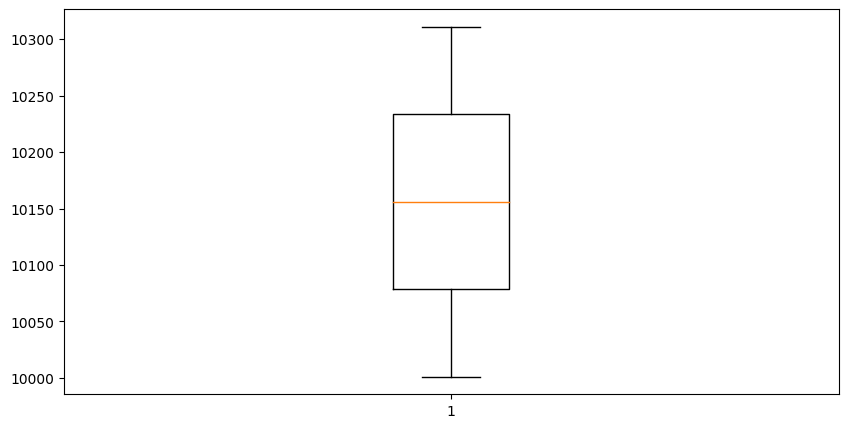

In [ ]:
# Graficar en box la variable EmpID
plt.figure(figsize = (10, 5))
plt.boxplot(dataframe['EmpID'])
plt.show()

#### 2.1.5.2. Analizar columna MarriedID

In [ ]:
# Analizar MarriedID
dataframe['MarriedID'].describe()

count     311.0
unique      4.0
top         0.0
freq      185.0
Name: MarriedID, dtype: float64

In [ ]:
# Ver la columna MarriedID
dataframe['MarriedID'].value_counts()

MarriedID
0.0    185
1.0    122
0        2
1        2
Name: count, dtype: int64

In [ ]:
# Cambiar tipo de dato columna MarriedID
dataframe['MarriedID'] = dataframe['MarriedID'].astype(bool)

In [ ]:
# Ver distribución variable MarriedID
dataframe['MarriedID'].value_counts()

MarriedID
False    185
True     126
Name: count, dtype: int64

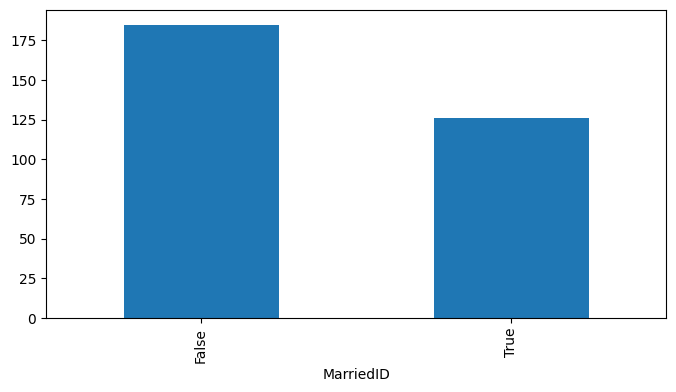

In [ ]:
# Graficar en barras la variable MarriedID
plt.figure(figsize = (8, 4))
dataframe['MarriedID'].value_counts().plot(kind = 'bar')
plt.show()

#### 2.5.1.3. Analizar columna MaritalStatusID

In [ ]:
# Ver describe de MaritalStatusID
dataframe['MaritalStatusID'].describe()

count     311.0
unique      7.0
top         0.0
freq      135.0
Name: MaritalStatusID, dtype: float64

In [ ]:
# Ver distribución de MaritalStatusID
dataframe['MaritalStatusID'].value_counts()

MaritalStatusID
0.0    135
1.0    122
2.0     30
3.0     12
4.0      8
0        2
1        2
Name: count, dtype: int64

In [ ]:
# Cambiar tipo de datos de object a int
dataframe['MaritalStatusID'] = dataframe['MaritalStatusID'].astype('int16')

In [ ]:
# Volver a ver la distribución
dataframe['MaritalStatusID'].value_counts()

MaritalStatusID
0    137
1    124
2     30
3     12
4      8
Name: count, dtype: int64

In [ ]:
# Ver MaritalStatusID igual a 3
# No entiendo la diferencia entre MarriedID y MaritalStatusID
# MaritalStatusID puede ser alguien que se haya separado, sea viudo, etc?
dataframe[dataframe['MaritalStatusID'] >= 3]

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
7,Athwal,Sam,10062,False,4,1.0,1.0,5.0,3.0,0.0,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.0,4.0,0.0,2/25/2019,0.0,19.0
31,Bugali,Josephine,10203,False,3,0.0,3.0,5.0,3.0,1.0,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,3.5,5.0,0.0,1/21/2019,0.0,17.0
68,Demita,Carla,10100,False,3,0.0,5.0,5.0,3.0,0.0,...,Kelley Spirea,18.0,Google Search,Fully Meets,4.62,5.0,0.0,5/6/2015,0.0,1.0
83,Erilus,Angela,10299,False,3,0.0,1.0,5.0,1.0,0.0,...,Michael Albert,22.0,Indeed,PIP,3.0,1.0,0.0,2/25/2019,2.0,5.0
104,Gill,Whitney,10142,False,4,0.0,4.0,6.0,3.0,0.0,...,John Smith,17.0,CareerBuilder,Fully Meets,3.97,4.0,0.0,1/15/2014,0.0,7.0
113,Gonzalez,Maria,10101,False,3,0.0,1.0,3.0,3.0,0.0,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.61,4.0,5.0,1/28/2019,0.0,11.0
116,Gosciminski,Phylicia,10218,False,3,0.0,3.0,5.0,3.0,0.0,...,Kissy Sullivan,20.0,Google Search,Fully Meets,4.4,5.0,0.0,2/21/2019,0.0,1.0
135,Hutter,Rosalie,10214,False,3,0.0,2.0,5.0,3.0,0.0,...,Webster Butler,NaN,Indeed,Fully Meets,4.5,3.0,0.0,2/14/2019,0.0,6.0
142,Jhaveri,Sneha,10060,False,3,0.0,1.0,5.0,3.0,0.0,...,Kelley Spirea,18.0,LinkedIn,Fully Meets,5.0,5.0,0.0,1/21/2019,0.0,9.0
166,Leruth,Giovanni,10103,False,3,1.0,1.0,6.0,3.0,0.0,...,John Smith,17.0,Website,Fully Meets,4.53,3.0,0.0,1/29/2019,0.0,16.0


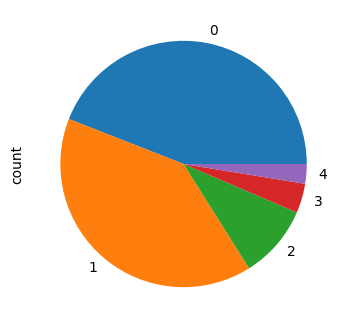

In [ ]:
# Hacer gráfico de barras de la columna MaritalStatusID
plt.figure(figsize = (8, 4))
dataframe['MaritalStatusID'].value_counts().plot(kind = 'pie')
plt.show()

#### 2.5.1.4. Analizar columna GenderID

In [ ]:
# Ver la distribución de GenderID
dataframe['GenderID'].value_counts()

GenderID
0.0    173
1.0    134
0        3
1        1
Name: count, dtype: int64

In [ ]:
# Cambiar tipo variable a int16
dataframe['GenderID'] = dataframe['GenderID'].astype('int16')

In [ ]:
# Volver a ver la distribución
# 0 es igual a masculino ?
dataframe['GenderID'].value_counts()

GenderID
0    176
1    135
Name: count, dtype: int64

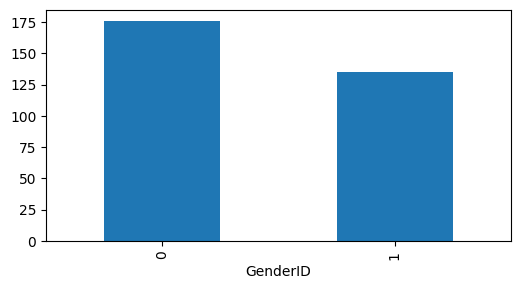

In [ ]:
# Graficar barras de GenderID
plt.figure(figsize = (6, 3))
dataframe['GenderID'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
dataframe.columns

Index(['LastName', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID',
       'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

#### 2.5.1.5. Analizar columna EmpStatusID

In [ ]:
# Ver distribución de EmpStatusID
dataframe['EmpStatusID'].value_counts()

EmpStatusID
1.0    183
5.0     88
3.0     14
4.0     11
2.0     11
4        3
1        1
Name: count, dtype: int64

In [ ]:
# Cambiar tipo de dato de EmpStatusID a int16
dataframe['EmpStatusID'] = dataframe['EmpStatusID'].astype('int16')

In [ ]:
# Volver a ver la distribución
# Que significa cada ID
dataframe['EmpStatusID'].value_counts()

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: count, dtype: int64

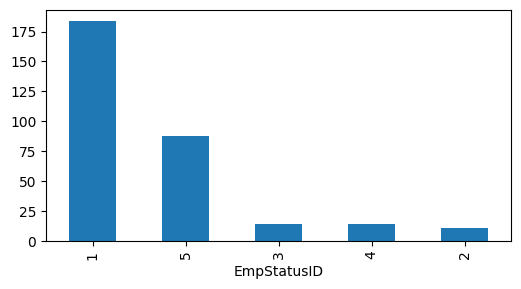

In [ ]:
# Graficar EmpStatusID
plt.figure(figsize = (6, 3))
dataframe['EmpStatusID'].value_counts().plot(kind = 'bar')
plt.show ()

#### 2.5.1.6. Analizar columna DeptID

In [ ]:
# Ver distribución
dataframe['DeptID'].value_counts()

DeptID
5.0    207
3.0     48
6.0     32
4.0     10
1.0      9
3        2
5        1
1        1
2.0      1
Name: count, dtype: int64

In [ ]:
# Cambiar tipo de variable
dataframe['DeptID'] = dataframe['DeptID'].astype('int16')

In [ ]:
# Vovler a ver la distribución
dataframe['DeptID'].value_counts()

DeptID
5    208
3     50
6     32
4     10
1     10
2      1
Name: count, dtype: int64

<Axes: xlabel='DeptID'>

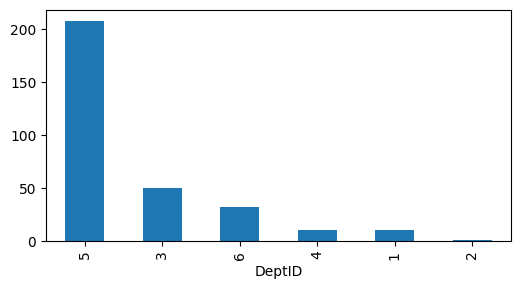

In [ ]:
# Graficar DeptID
# Cuál es el código de cada departamento
plt.figure(figsize = (6, 3))
dataframe['DeptID'].value_counts().plot(kind = 'bar')

#### 2.5.1.7. Analizar columna PerfScoreID

Performance Score code that matches the employee's most recent Performance score

In [ ]:
# Ver distribución de PerfScoreId
dataframe['PerfScoreID'].value_counts()

PerfScoreID
3.0    240
4.0     37
2.0     17
1.0     13
3        3
2        1
Name: count, dtype: int64

In [ ]:
# Cambiar tipo dato columna PerfScoreId a Int16
dataframe['PerfScoreID'] = dataframe['PerfScoreID'].astype('int16')

In [ ]:
# Volver a ver distribución
# Entender qué significa cada código
dataframe['PerfScoreID'].value_counts()

PerfScoreID
3    243
4     37
2     18
1     13
Name: count, dtype: int64

<Axes: xlabel='PerfScoreID'>

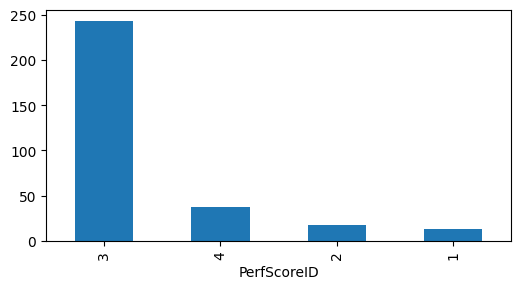

In [ ]:
# Graficar columna PerfScoreId
plt.figure(figsize = (6, 3))
dataframe['PerfScoreID'].value_counts().plot(kind = 'bar')

#### 2.5.1.8. Analizar columna FromDiversityJobFairID

Was the employee sourced from the Diversity job fair?

In [ ]:
# Ver distribución
dataframe['FromDiversityJobFairID'].value_counts()

FromDiversityJobFairID
0.0    278
1.0     29
0        4
Name: count, dtype: int64

In [ ]:
# Volver columna FromDiversityJobFairID tipo int16
dataframe['FromDiversityJobFairID'] = dataframe['FromDiversityJobFairID'].astype('int16')

In [ ]:
# Volver a ver la distribución
dataframe['FromDiversityJobFairID'].value_counts()

FromDiversityJobFairID
0    282
1     29
Name: count, dtype: int64

#### 2.5.1.9. Analizar columna Salary

In [ ]:
# Ver info de dato de Salary
dataframe['Salary'].info()

<class 'pandas.core.series.Series'>
Index: 311 entries, 0 to 310
Series name: Salary
Non-Null Count  Dtype 
--------------  ----- 
311 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [ ]:
# Cambiar tipo de dato a float
dataframe['Salary'] = dataframe['Salary'].astype('float')

In [ ]:
# Comprobar cambio con info
dataframe['Salary'].info()

<class 'pandas.core.series.Series'>
Index: 311 entries, 0 to 310
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
311 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


<Axes: ylabel='Salary'>

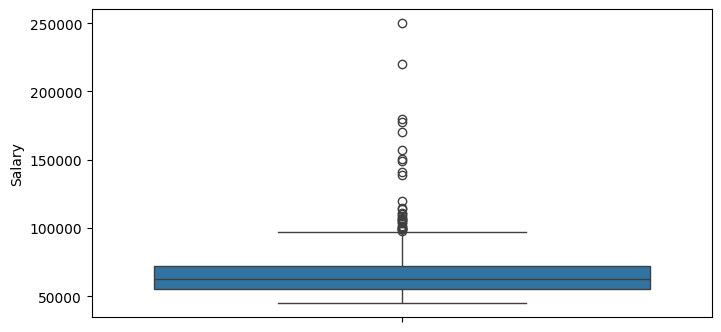

In [ ]:
# Hacer un boxplot para ver la distribución de Salary
plt.figure(figsize = (8, 4))
sns.boxplot(dataframe['Salary'])

<ipython-input-94-6ce9e1212a2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

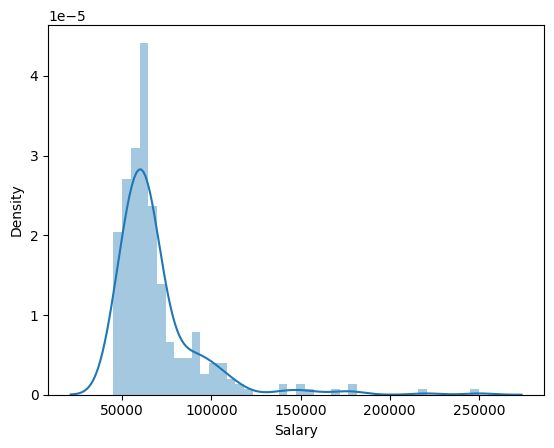

In [ ]:
sns.distplot(dataframe['Salary'])

In [ ]:
# Ver descripción de Salary
dataframe['Salary'].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [ ]:
dataframe.columns

Index(['LastName', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID',
       'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

#### 2.5.1.10. Analizar columna Termd

Has this employee been terminated - 1 or 0

In [ ]:
# Ver distribución de Termd
dataframe['Termd'].value_counts()

Termd
0.0    207
1.0    100
1        4
Name: count, dtype: int64

In [ ]:
# Hacer de Termd bool
dataframe['Termd'] = dataframe['Termd'].astype('bool')

In [ ]:
# Comprobar distribución
# Realmente tiene 207 empleados trabajando actualmente
dataframe['Termd'].value_counts()

Termd
False    207
True     104
Name: count, dtype: int64

#### 2.5.1.11. Analizar columna PositionID

  An integer indicating the person's position.

In [ ]:
# Ver distribución PositionID
dataframe['PositionID'].value_counts()

PositionID
19.0    136
20.0     57
3.0      27
18.0     13
24.0      9
14.0      8
9.0       8
28.0      5
15.0      5
13.0      4
4.0       4
22.0      3
21.0      3
1.0       3
8.0       3
27.0      2
26.0      2
2.0       2
8         2
23.0      2
5.0       1
16.0      1
17.0      1
7.0       1
29.0      1
11.0      1
2         1
10.0      1
12.0      1
30.0      1
19        1
25.0      1
6.0       1
Name: count, dtype: int64

In [ ]:
# Hacer la vaiable PositionID int16
dataframe['PositionID'] = dataframe['PositionID'].astype('int16')

In [ ]:
# Comprobar la distribución
dataframe['PositionID'].value_counts()

PositionID
19    137
20     57
3      27
18     13
24      9
14      8
9       8
15      5
28      5
8       5
4       4
13      4
22      3
2       3
1       3
21      3
23      2
26      2
27      2
10      1
12      1
11      1
5       1
16      1
25      1
30      1
29      1
7       1
17      1
6       1
Name: count, dtype: int64

<Axes: xlabel='PositionID'>

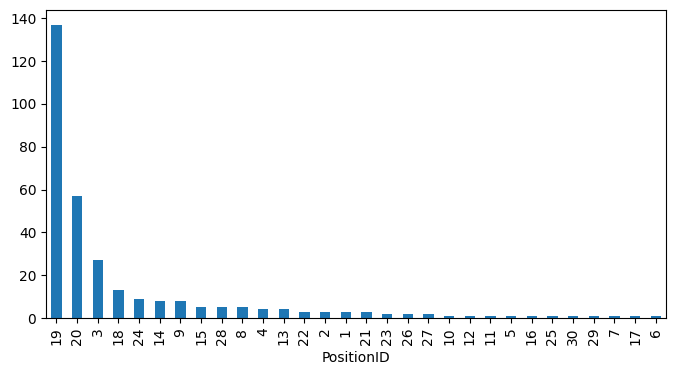

In [ ]:
# Hacer gráfico de PositionID
plt.figure(figsize = (8, 4))
dataframe['PositionID'].value_counts().plot(kind = 'bar')

#### 2.5.1.12. Analizar la columna Position

The text name/title of the position the person has.

In [ ]:
# Ver distribución de Position
dataframe['Position'].value_counts()

Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Accountant                    2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales  

In [ ]:
# Cambiar tipo variable a string
dataframe['Position'] = dataframe['Position'].astype('string')

In [ ]:
# Ver la distribución
# Se ve dos veces el carga Data analyst 7 y 1
dataframe['Position'].value_counts()

Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                           2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales  

In [ ]:
# Ver valores únicos de Position
# Se ve que 'Data Analyst ' tiene un espacio en blanco.
dataframe['Position'].unique()

<StringArray>
[     'Production Technician I',                      'Sr. DBA',
     'Production Technician II',            'Software Engineer',
                   'IT Support',                 'Data Analyst',
       'Database Administrator',         'Enterprise Architect',
               'Sr. Accountant',           'Production Manager',
                 'Accountant I',           'Area Sales Manager',
 'Software Engineering Manager',                  'BI Director',
       'Director of Operations',         'Sr. Network Engineer',
                'Sales Manager',                 'BI Developer',
         'IT Manager - Support',             'Network Engineer',
                  'IT Director',            'Director of Sales',
     'Administrative Assistant',              'President & CEO',
          'Senior BI Developer',      'Shared Services Manager',
           'IT Manager - Infra',     'Principal Data Architect',
               'Data Architect',              'IT Manager - DB',
           

In [ ]:
# Ver las posiciones en la que están los datos
dataframe[dataframe['Position'] == 'Data Analyst ']

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
249,Salter,Jason,10229,False,2,1,5,3,3,0,...,Simon Roup,4.0,LinkedIn,Fully Meets,4.2,3.0,5.0,4/20/2015,0.0,2.0


In [ ]:
# Saber cuál es el número de la columna Position
dataframe.columns.get_loc('Position')

13

In [ ]:
# Ver fila 249 hasta columna 14
dataframe.iloc[248, 0:15]

LastName                         Salter
Employee_Name                     Jason
EmpID                             10229
MarriedID                         False
MaritalStatusID                       2
GenderID                              1
EmpStatusID                           5
DeptID                                3
PerfScoreID                           3
FromDiversityJobFairID                0
Salary                          88527.0
Termd                              True
PositionID                            9
Position                  Data Analyst 
State                                MA
Name: 249, dtype: object

In [ ]:
# Modificar index 249 columna Position por 'Data Analyst'
dataframe.iloc[248, 13] = 'Data Analyst'

In [ ]:
# Ver la distribución
dataframe['Position'].value_counts()

Position
Production Technician I         136
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
Data Analyst                      9
IT Support                        8
Network Engineer                  5
Sr. Network Engineer              5
Database Administrator            5
BI Developer                      4
Sales Manager                     3
Accountant I                      3
Senior BI Developer               3
Administrative Assistant          3
Sr. DBA                           2
Sr. Accountant                    2
IT Manager - DB                   2
President & CEO                   1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
Shared Services Manager           1
IT Director                       1
Director of Sales                 1
IT Manager - Support              1
Director of Operations            1
BI Director        

In [ ]:
# Ver todos los Position == Data Analyst
dataframe[dataframe['Position'] == 'Data Analyst']

,LastName,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
12,Barbossa,Hector,10012,False,2,1,1,3,4,1,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4.0,5.0,2/25/2019,0.0,9.0
57,Costello,Frank,10193,True,1,1,1,3,3,0,...,Simon Roup,4.0,Indeed,Fully Meets,3.04,3.0,6.0,1/22/2019,0.0,2.0
213,Pearson,Randall,10259,True,1,1,5,3,3,0,...,Simon Roup,4.0,Employee Referral,Fully Meets,4.7,4.0,5.0,1/16/2016,0.0,19.0
220,Petrowsky,Thelma,10016,True,1,0,1,3,4,0,...,Simon Roup,4.0,Employee Referral,Exceeds,4.6,5.0,7.0,1/4/2019,0.0,16.0
238,Roby,Lori,10162,True,1,0,1,3,3,0,...,Simon Roup,4.0,Employee Referral,Fully Meets,3.69,5.0,6.0,2/14/2019,0.0,15.0
250,Sander,Kamrin,10169,True,1,0,1,5,3,0,...,Elijiah Gray,16.0,LinkedIn,Fully Meets,3.51,3.0,0.0,2/18/2019,0.0,2.0
254,Simard,Kramer,10178,True,1,1,1,3,3,0,...,Simon Roup,4.0,Employee Referral,Fully Meets,3.32,3.0,7.0,1/14/2019,0.0,16.0
309,Zhou,Julia,10043,False,0,0,1,3,3,0,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.0,3.0,5.0,2/1/2019,0.0,11.0
